video link: https://nyu.zoom.us/rec/share/5P4sdZTM2XlOYtLt4WfzVZEeXY3paaa82iNM_qUMzk6WgpzH6WGfsFXMPTr6UXwh?startTime=1584335402000

In [14]:
import os

In [15]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [16]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

In [17]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

'Dress'

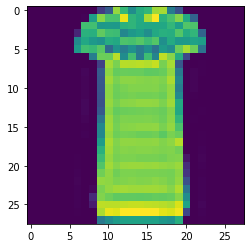

In [21]:
index = 323
plt.imshow(train_images[index])
class_names[train_labels[index]]

In [22]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [23]:
train_images = train_images/255.0
test_images = test_images/255.0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.17254902,
        0.28627451, 0.84313725, 0.67058824, 0.49019608, 0.62352941,
        0.6627451 , 0.85490196, 0.86666667, 0.41960784, 0.25490196,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.55686275, 0.82352941,
        0.71764706, 0.71372549, 0.97254902, 0.65490196, 0.61176471,
        0.8745098 , 0.99607843, 0.63921569, 0.71372549, 0.81568627,
        0.60784314, 0.31764706, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.69803922, 0.69803922, 0.53333333,
        0.54509804, 0.5372549 , 0.63921569, 0.65490196, 0.60784314,
        0.6       , 0.5960

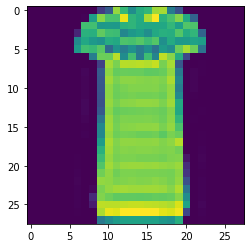

In [24]:
plt.imshow(train_images[index])
train_images[index]

In [25]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation = "relu"),
    Dense(10, activation = "softmax")
])

In [26]:
model.compile(optimizer= 'RMSprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [27]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5018 - accuracy: 0.8200
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3752 - accuracy: 0.8651
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3462 - accuracy: 0.8760
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3307 - accuracy: 0.8833
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3172 - accuracy: 0.8895


In [28]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 17us/step


[0.3774884891629219, 0.8708999752998352]

In [29]:
model.save("week05_03_first_model.h5")